In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Desktop/loan.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Exploratory Data Analysis
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.shape

(614, 13)

In [11]:
#Grouping loan status count
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
#Normalized loan status count
df["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

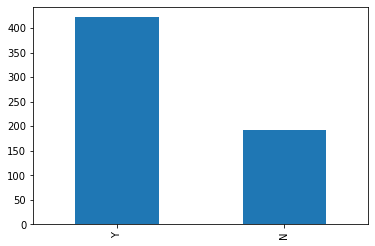

In [14]:
#bar plot for loan status
df["Loan_Status"].value_counts().plot.bar()

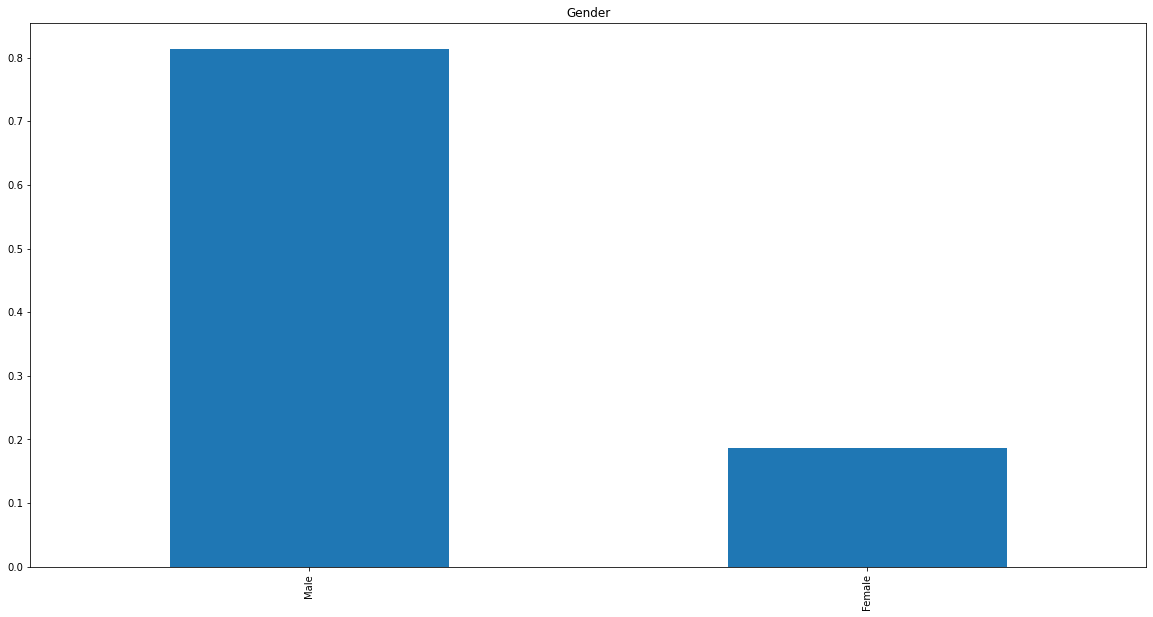

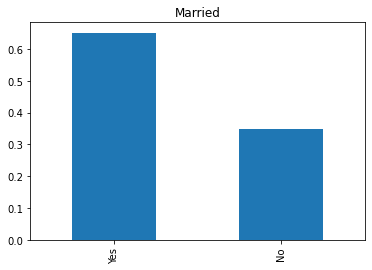

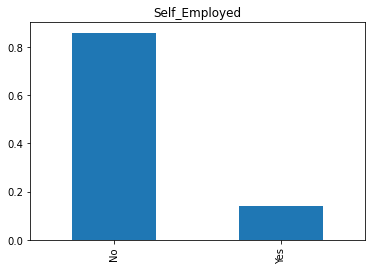

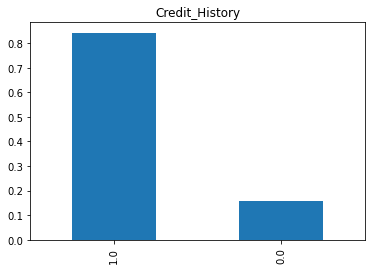

In [17]:
#Catogerical Data visualization 
df["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")
plt.show()
df["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.show()
df["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.show()
df["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()

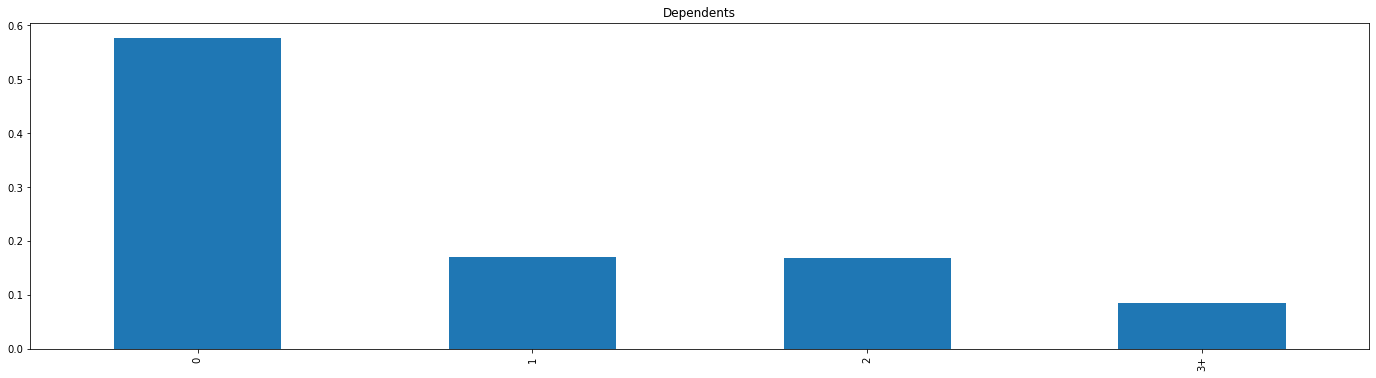

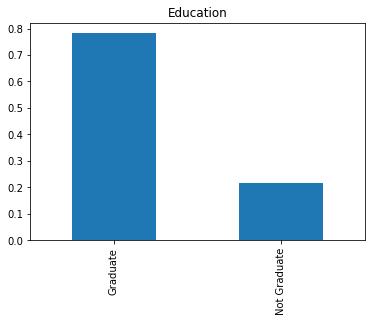

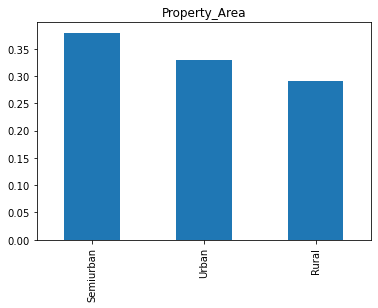

In [18]:
#Numerical Data Visualization
df["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.show()
df["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.show()
df["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

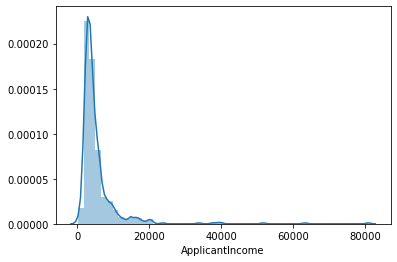

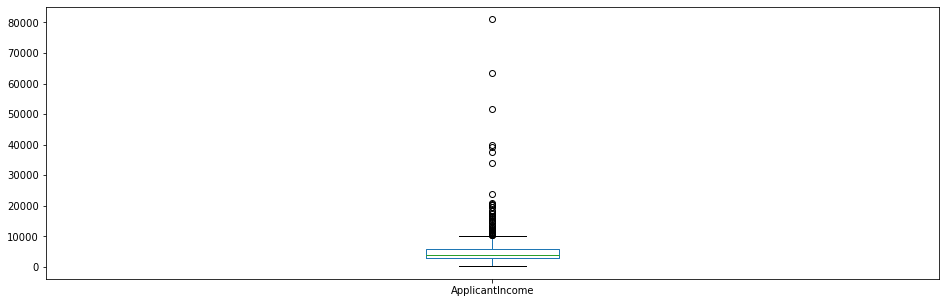

In [21]:
#Numeric values box plot
sns.distplot(df["ApplicantIncome"])
plt.title = "Applicant Income"
plt.show()
df["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

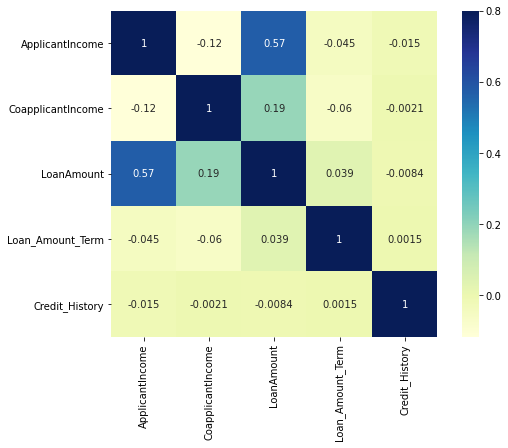

In [22]:
#heat plot
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="YlGnBu", annot = True)

In [24]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#filling missing values
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)


In [31]:
#check for missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
#Setting target variable
X = df.drop("Loan_Status",1)
y = df.Loan_Status

In [36]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [37]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [40]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
419,LP002347,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban
354,LP002143,Female,Yes,0,Graduate,No,2423,505.0,130.0,360.0,1.0,Semiurban
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,128.0,360.0,1.0,Urban


In [41]:
x_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
504,LP002619,Male,Yes,0,Not Graduate,No,3814,1483.0,124.0,300.0,1.0,Semiurban
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,128.0,360.0,1.0,Rural
534,LP002731,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban
520,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban


In [42]:
y_train.head()

419    Y
179    N
354    Y
13     N
479    N
Name: Loan_Status, dtype: object

In [43]:
y_test.head()

504    Y
551    Y
534    Y
561    Y
520    Y
Name: Loan_Status, dtype: object

In [7]:
s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
X_train = x_train.copy()
X_test = x_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(x_train[col])
    X_test[col] = label_encoder.fit_transform(x_test[col])


In [51]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
419,291,1,1,0,0,0,3246,1417.0,138.0,360.0,1.0,1
179,129,1,0,0,1,0,2333,1451.0,102.0,480.0,0.0,2
354,245,0,1,0,0,0,2423,505.0,130.0,360.0,1.0,1
13,10,1,0,0,0,0,1853,2840.0,114.0,360.0,1.0,0
479,335,1,1,2,0,0,2947,1603.0,128.0,360.0,1.0,2


In [52]:
y_train.head()

419    Y
179    N
354    Y
13     N
479    N
Name: Loan_Status, dtype: object

In [61]:
#Logestic regression(Fitting model)
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier()
model_1.fit(X_train,y_train)
print("\nRandomForestClassifier model Accuracy(in %):",model_1.score(X_train,y_train))


RandomForestClassifier model Accuracy(in %): 0.9976689976689976


In [68]:
#logestic regression (Fitting model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

C:\Users\THANGAVEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
#Accuracy score
pred_test = model.predict(X_test)
accuracy_score(y_test,pred_test)

0.7945945945945946

In [10]:
from sklearn import tree
model_3 = tree.DecisionTreeClassifier()
model_3.fit(X_train,y_train)
print("\nDecisionTreeClassifier model Accuracy(in %):",model_3.score(X_train,y_train))


DecisionTreeClassifier model Accuracy(in %): 1.0


In [78]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [72]:
#parametric tuning
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [73]:
print("Tuned RandomForestClassifier Parameters: : ",CV_rfc.best_params_)
print("Best score : ",CV_rfc.best_score_)

Tuned RandomForestClassifier Parameters: :  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
Best score :  0.8158686730506156


In [74]:
#hyper parametric optimization
rfc1=RandomForestClassifier(random_state=4, max_features='log2', n_estimators= 200,max_depth=7, criterion='entropy')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7945945945945946


In [89]:
param_grid_1 = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [90]:
DT = tree.DecisionTreeClassifier()
CV_DT = GridSearchCV(estimator=DT, param_grid=param_grid_1, cv= 5)
CV_DT.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [91]:
print("Tuned RandomForestClassifier Parameters: : ",CV_DT.best_params_)
print("Best score : ",CV_DT.best_score_)

Tuned RandomForestClassifier Parameters: :  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}
Best score :  0.7902051983584132
